In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
A = np.eye(5)

In [ ]:
print(A)

In [ ]:
def warmUpExcercise():
    A = []
    
    for i in range(5):
        row=[]
        for j in range(5):
            if j == i:
                row.append(1)
            row.append(0)
        A.append(row)
    return A

In [ ]:
warmUpExcercise()

In [17]:
data = np.loadtxt('data1.txt',delimiter=',')
x,y = data[:,0], data[:,1]
m = y.size

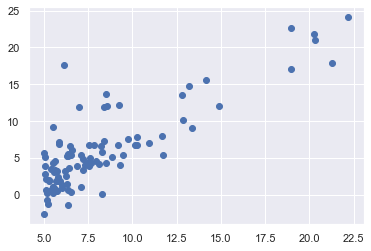

In [18]:
plt.scatter(x,y);

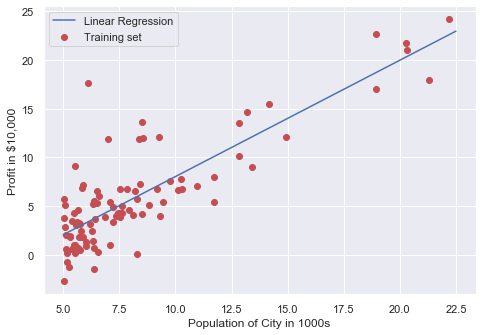

In [19]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(5,22.5,100)
yfit = model.predict(xfit[:, np.newaxis])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.scatter(x,y,c='r', marker='o', Label='Training set')
ax.plot(xfit,yfit, label='Linear Regression');
ax.set_xlabel('Population of City in 1000s')
ax.set_ylabel('Profit in $10,000')
plt.legend()

In [20]:
# Gradient Descent
x = np.stack([np.ones(m), x], axis=1)

In [36]:
def computeCost(X,y,theta):
    m = y.size
    
    hyp = X.dot(theta)
    dif = np.square(hyp - y)
    
    j = (np.sum(dif)) * (1/(2*m))
    return j

In [37]:
J = computeCost(x,y,theta=np.array([-1,2]))
print('%.2f'%J)

54.24


In [38]:
def GradientDescent(X, y, theta, alpha, num_iters):
    
    J_history = []
    
    for i in range(num_iters):
        der = 1/m * np.transpose(X).dot(X.dot(theta) - y)
        theta = theta - (alpha * der)
        cost_val = computeCost(X,y,theta)
        J_history.append(cost_val)
        
    return theta, J_history

In [39]:
theta, J_history = GradientDescent(x ,y, theta=np.zeros(2), alpha=0.01, num_iters=1500)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


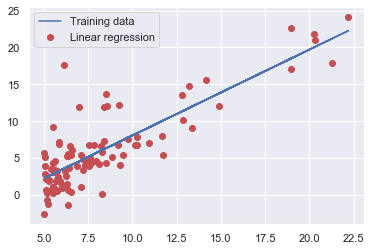

In [40]:
# plot the linear fit
plt.scatter(x[:,1],y,c='r', marker='o')
plt.plot(x[:, 1], np.dot(x, theta), '-')
plt.legend(['Training data', 'Linear regression']);

In [41]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



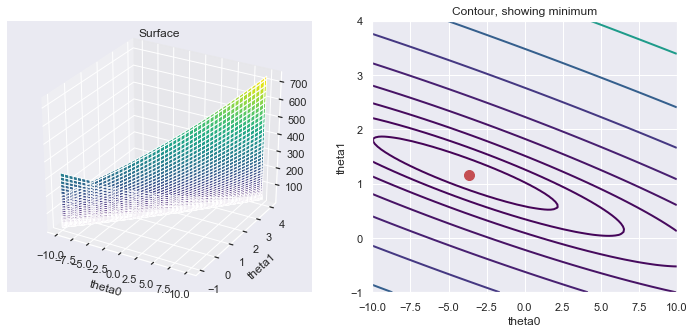

In [45]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(x, y, [theta0, theta1])
        
J_vals = J_vals.T

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')
pass

In [ ]:
## 